In [51]:
import pandas as pd
medical_df = pd.read_csv('insurance-data.csv')

In [ ]:
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [53]:
# Inspecting the datatypes of each variable
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [54]:
## Getting basic summary statistics of our data
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
# DATA VISUALIZATION

# Plotly for interractive charts 

import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

### Ensuring that charts are displayed in Jupyter cells but not python pop-ups.  
%matplotlib inline 

In [ ]:
# Changing the style and font-size 
sns.set_style('darkgrid')
matplotlib.rcParams['font.size']=14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

Describing The Distribution of Age

The minimum age is 18 and max is 64, we use a nbin of 47, ie. 1 bin for each age.

In [57]:
medical_df.age.describe()
fig = px.histogram(medical_df,
                   x='age',
                   marginal='box',
                   nbins=47,
                   title='Age Distribution')
fig.update_layout(bargap=0.1)
fig.show()

The age above mimics a uniform distribution except those of 18 and 19 which looks like 2x more than the rest of the population.

Now Let us Plot for BMI


In [58]:
fig = px.histogram(medical_df,
                   x='bmi',
                   marginal='box',
                   color_discrete_sequence=['red'],
                   title='Distribution of BMI')
fig.update_layout(bargap=0.1)
fig.show()

DISTRIBUTION OF CHARGES

We are plotting the annual hospital bills of smokers and non-smokers on the same histogram.
From the chart below, we can see that the charges take an exponential / power law or distribution. ie. something like a right skewed distribution.


In [59]:
fig = px.histogram(medical_df,
                   x='charges',
                   marginal='box',
                   color='smoker',
                   color_discrete_sequence=['green', 'grey'],
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

Visualizing Charges With Respect to Sex

In [60]:
fig = px.histogram(medical_df,
                   x='charges',
                   marginal='box',
                   color='sex',
                   color_discrete_sequence=['green', 'blue'],
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

VISUALIZING CHARGES WITH RESPECT TO AGE in a scatter plot.
We also color the datapoint based on smoking status.

In [61]:
fig = px.scatter(medical_df,
                   x='age',
                   y='charges',
                  #  marginal='box',
                   color='smoker',
                   opacity=0.8,
                   hover_data=['sex'],
                   title='Age Vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

VISUALIZING CHARGES WITH RESPECT TO BMI in a scatter plot.
We also color the datapoint based on smoking status.

In [62]:
fig = px.scatter(medical_df,
                   x='bmi',
                   y='charges',
                #    marginal='box',
                   color='smoker',
                   opacity=0.8,
                   hover_data=['sex'],
                   title='BMI Vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

In [63]:
### Counts of Smokers & Non-smokers
medical_df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [64]:
#### Juxtaposing Smokers & Non-Smokers According To Sex
px.histogram(medical_df, x='smoker', color='sex', title='Smoker')

In [ ]:
# Getting a better picture of the data using a Violin Plot
px.scatter(medical_df, x='children', y='charges') # Code 1 - Scatter Plot
px.violin(medical_df, x='children', y='charges') # Code 2 - Violin Plot


CORRELATION ANALYSIS

In [66]:
medical_df.charges.corr(medical_df.age)

0.2990081933306478

In [67]:
medical_df.charges.corr(medical_df.bmi)

0.19834096883362887

In [68]:
medical_df.charges.corr(medical_df.children)

0.06799822684790487

In [ ]:
medical_df.charges.corr(medical_df.smoker)
smoker_values = {'no': 0, 'yes':1}
smoker_numeric = medical_df.smoker.map(smoker_values)
smoker_numeric


0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: int64

In [ ]:
medical_df.charges.corr(smoker_numeric)

0.7872514304984778

In [71]:
# You can also draw a correlation table for all your numerical variables in your data frame, with just one function

medical_df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [72]:
# You can see that the correlation between age and age is 1.00
# Which means a perfect +ve correlation. And we can draw the scatter plot to show

px.scatter(medical_df, x='age', y='age')

Text(0.5, 1.0, 'Correlation Matrix')

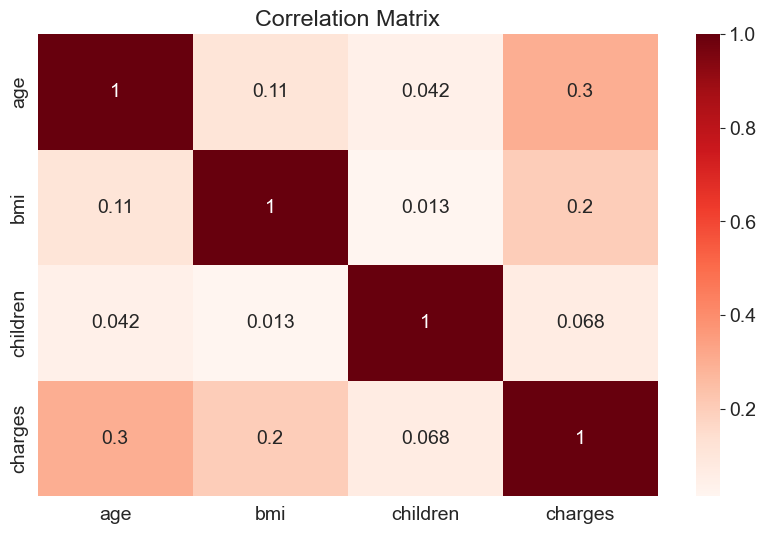

In [ ]:
sns.heatmap(medical_df.corr(), cmap='Reds', annot=True,)
plt.title('Correlation Matrix')

Not that correlation does not connote causation. This becomes dangerous if we leave pattern recognition to computers ALONE and we do not supervise them. Computers are not really able to tell the difference between CORRELATION & CAUSATION.
In 2019, this happened to Amazon, they sold facial recognition system to Law Enforcement Agencies. This system - called Rekognition classifed more black men a CRIMINALS.

In [74]:
# =============================================================================================

SIMPLE LINEAR REGRESSION - ie. Using a Single Variable
Now we know that from our correlation analysis, the highest predictors of Medical Charges were: "Age" and "Smoker"

Now let's find a way of estimating the value of medical charges using the values of age for *non-smokers* 

In [75]:
non_smoker_df = medical_df[medical_df.smoker == 'no']

<Axes: title={'center': 'Age Vs Charges'}, xlabel='age', ylabel='charges'>

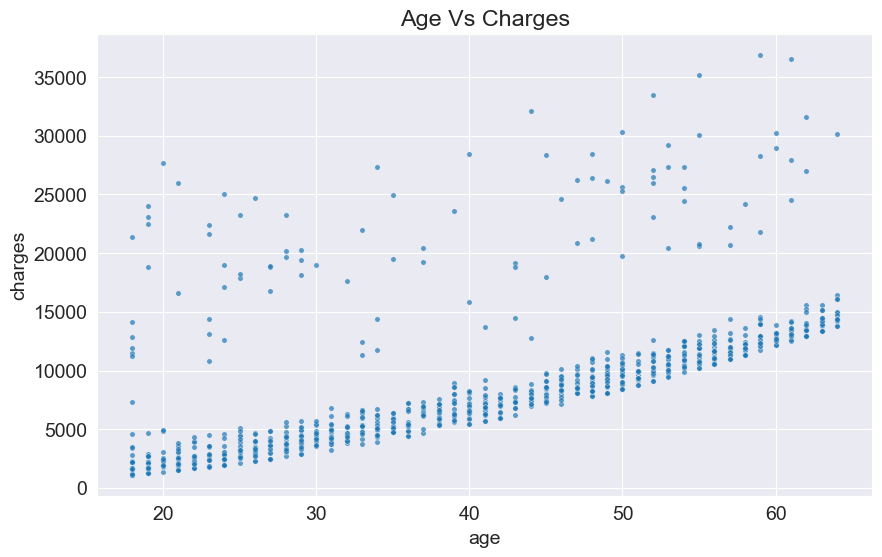

In [76]:
plt.title('Age Vs Charges')
sns.scatterplot(data=non_smoker_df, x='age', y='charges', alpha=0.7, s=15)

Building a model is all about, finding a line that could predict our charge when a certain age is given.
Every line has an equation y = mx + c, in ML we like to use y = wx + b
ie. w = weights 
    b = bias
    Weight is the slope - It tells the extent to which y changes with a unit change in x

    From the above scatter plot, we can see that age is on the x-axis while charges is on the y-axis.
    


In [79]:
# Let's get a prediction for someone aged 30 using our hypothertical LR model
# 
estimate_charges(30, w, b)

##Our output which is 1600 is way below the expected - even comparing to the Scatter Plot Above. 30 years should be over 2500

1600

In [80]:
# Let us now try and use our model to estimates the charges and compare to actual charges
ages = non_smoker_df.age
estimated_charges = estimate_charges(ages, w, b)
estimated_charges

1       1000
2       1500
3       1750
4       1700
5       1650
        ... 
1332    2700
1333    2600
1334    1000
1335    1000
1336    1150
Name: age, Length: 1064, dtype: int64

In [81]:
print(non_smoker_df.charges)

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64


Text(0, 0.5, 'Estimated Charges')

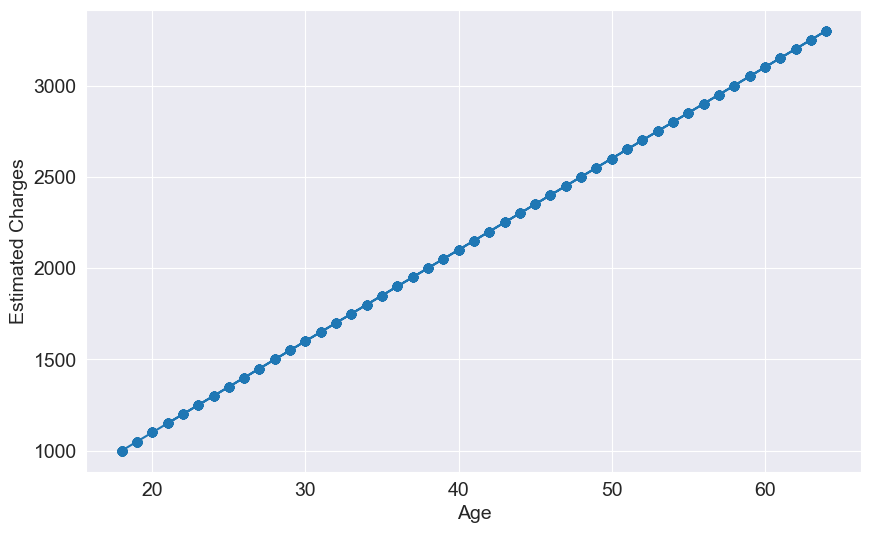

In [ ]:

plt.scatter(ages, estimated_charges)
plt.plot(ages, estimated_charges) 
plt.xlabel('Age')
plt.ylabel('Estimated Charges')

ASSESSING THE PERFORMANCE OF OUR MODEL


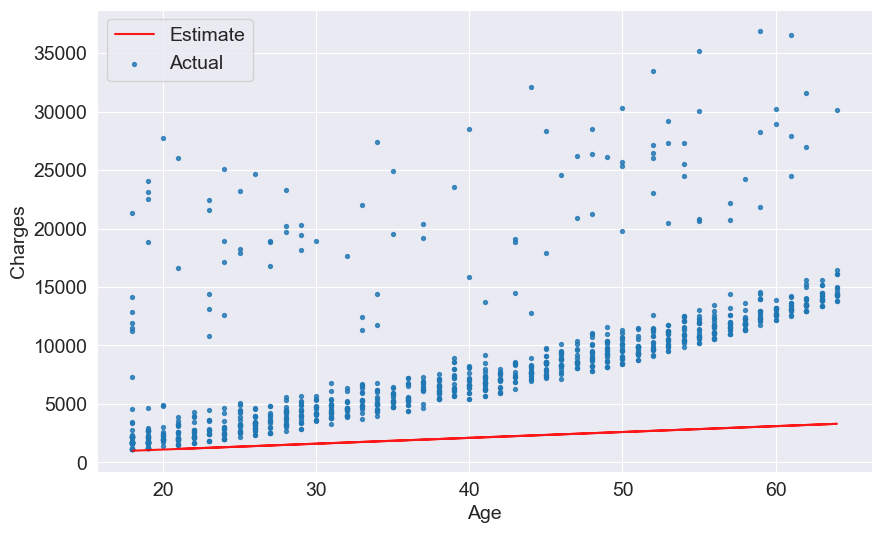

In [ ]:
target = non_smoker_df.charges

plt.plot(ages, estimated_charges, 'r', alpha=0.9)

plt.scatter(ages, target, s=8, alpha=0.8)
plt.xlabel('Age')
plt.ylabel("Charges")
plt.legend(['Estimate', 'Actual'])



Imporving our model

In [ ]:

def try_parameters(w, b):
    ages = non_smoker_df.age

    target = non_smoker_df.charges

    estimated_charges = estimate_charges(ages, w, b)

    plt.plot(ages, estimated_charges, 'r', alpha=0.9)
    plt.scatter(ages, target, s=8, alpha=0.8)
    plt.xlabel('Age')
    plt.ylabel('Charges')
    plt.legend('Estimate', 'Actual')

C:\Users\PHG HUB\AppData\Local\Temp\ipykernel_16300\3105956018.py:16: UserWarning:

Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries



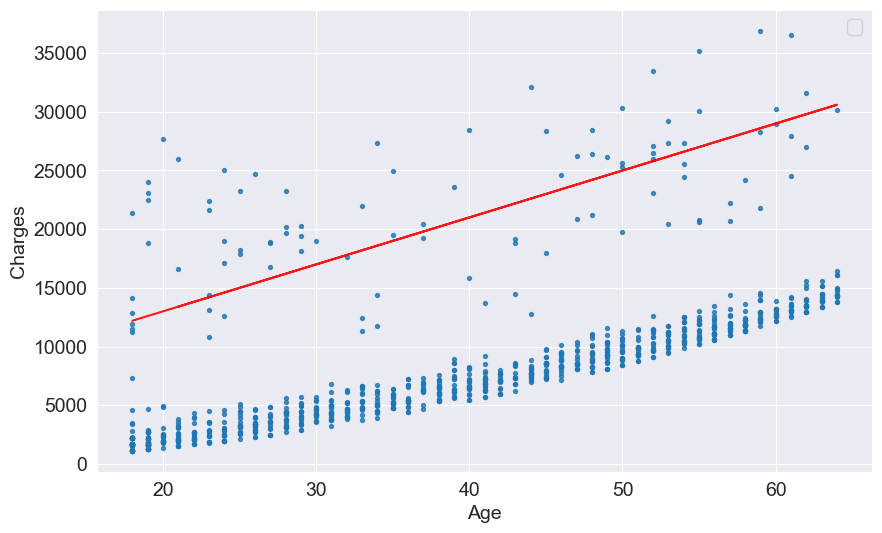

In [86]:
# try_parameters(60, 200)
try_parameters(400, 5000)

Using the try_parameter() function, we insert values and compare the regression line & the scatter plot for fit.

Could this process be automated???
Can the computer start assuming a random w and b value, and based on the response it receives, improve, to get a good regression line?

*We have eyes, so we can easily see if the regresion line described by our w and b fit the scatter plot or not.

But how does the computer determine that?

LOSS / COST FUNCTION
Helps to grade our model's performance
We subtract the predicted value from the actual value. (This result is called, RESIDUAL)

Residual - tells how far our model's prediction is from the actual value.

Residual Alone may not be useful, because, some values may be +ve; others may be -ve, so we take the absolute values. And find their average.

If we want to penalize outliers, we square the predicted values and expected values to get a squared residual - and this gives us the RMSE(Root Mean Square Error)

We also have RMAE - Root Mean Absolute Error ( this does not penalize outliers - so it is useful if you have outliers in your data and you don't want the model to be essentially affected by the outliers)





In [ ]:
## Defining a custom function to calculate the RMSE of our model
import numpy as np
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

C:\Users\PHG HUB\AppData\Local\Temp\ipykernel_16300\3105956018.py:16: UserWarning:

Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries



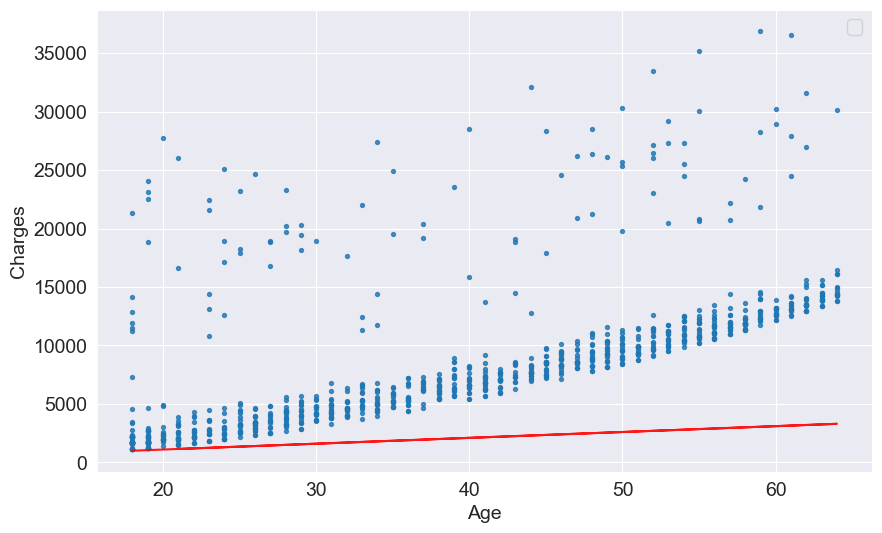

In [88]:
w = 50
b = 100
try_parameters(w, b)

In [89]:
targets = non_smoker_df['charges']
predicted = estimate_charges(non_smoker_df.age, w, b)

In [ ]:
rmse(target, predicted)
#On average, each prediction differs from the actual value by $8461

8461.949562575493

The RMSE is also called the loss function. It tells how bad our model is, when it comes to predicting values.

Note that, all models are wrong, but some are useful. 

In the next code, let us try to vary our b and w to find the lowest loss we can ever have.

In [91]:
def try_parameters(w, b):
    ages = non_smoker_df.age

    target = non_smoker_df.charges

    predictions = estimate_charges(ages, w, b)

    plt.plot(ages, predictions, 'r', alpha=0.9)
    plt.scatter(ages, target, s=8, alpha=0.8)
    plt.xlabel('Age')
    plt.ylabel('Charges')
    plt.legend('Predictions', 'Actual')

    loss = rmse(target, predictions)
    print("RMSE Loss:", loss)

C:\Users\PHG HUB\AppData\Local\Temp\ipykernel_16300\2612522190.py:12: UserWarning:

Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries



RMSE Loss: 5837.053173265296


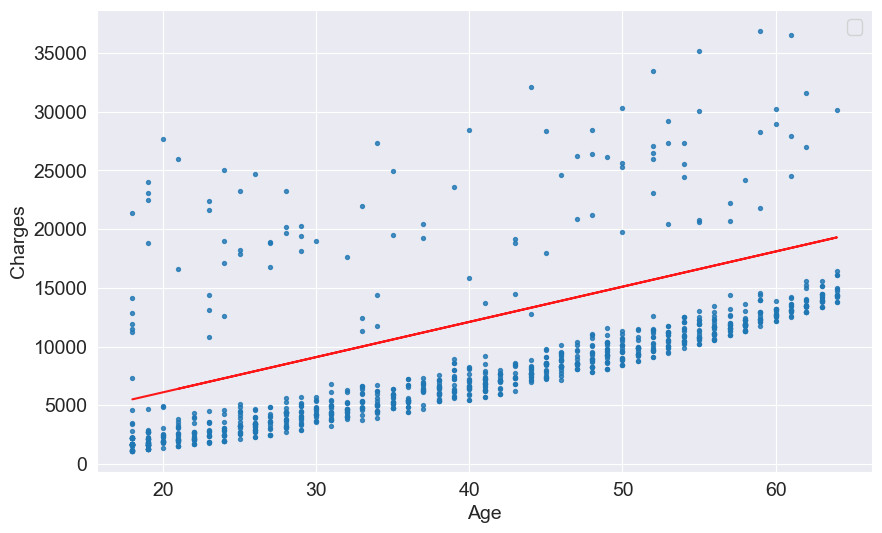

In [ ]:
try_parameters(300, 100)


!!!!! Very Important Topic - OPTIMIZERS

We need a strategy to modify our weights and bias for our model to give the best predictions. This is how you start. Take a hypothetical weight and bias values, increase or decrease w by a small value, note the direction that reduces RMSE and then do higher increament / decreament in that direction.
This is what ML Algorithms do. 

1. Ordinary Least Squares (suitable for smaller datasets): It uses Calculus & Linear Algebra to arrive at the best w and b values.

2. Stochastic Gradient Descent: That is the analogy we made in the opening statement of the cell. You either increament/decrement in small steps to know the direction that reduces the RMSE and then do higher changes in that dircetion - (Works well for large datasets). It starts with a flat line and then improves.

Look at the image in the file directory


![Stochastic Gradient Descent Image](sdg.gif)

USING SCIKIT LEARN TO AUTOMATE THE PROCESS


In [93]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()



In [ ]:

inputs = non_smoker_df[['age']]
target = non_smoker_df.charges
print('inputs.shape:', inputs.shape)
print('target.shape:', target.shape)

inputs.shape: (1064, 1)
target.shape: (1064,)


In [95]:
model.fit(inputs, targets)

LinearRegression()

In [ ]:
## Predicting the values of charges for age 23, 37 and 51

model.predict(np.array([[23], 
                        [37],
                        [61]]))

c:\Users\PHG HUB\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([ 4055.30443855,  7796.78921819, 14210.76312614])

In [97]:
## Now let us feed make our model predict the charges for all our data and then compare to what we have

predictions =  model.predict(inputs)

predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [ ]:

targets

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

In [ ]:
# calculating the rmse for our model
rmse(targets, predictions)

4662.505766636395

You may ask, in SKLEARN, where is our w and b

w - is stored as model.coef_

b - stored as model.intercept_

In [100]:
model.coef_



array([267.24891283])

In [101]:
model.intercept_

-2091.4205565650864

C:\Users\PHG HUB\AppData\Local\Temp\ipykernel_16300\2612522190.py:12: UserWarning:

Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries



RMSE Loss: 4662.505766636395


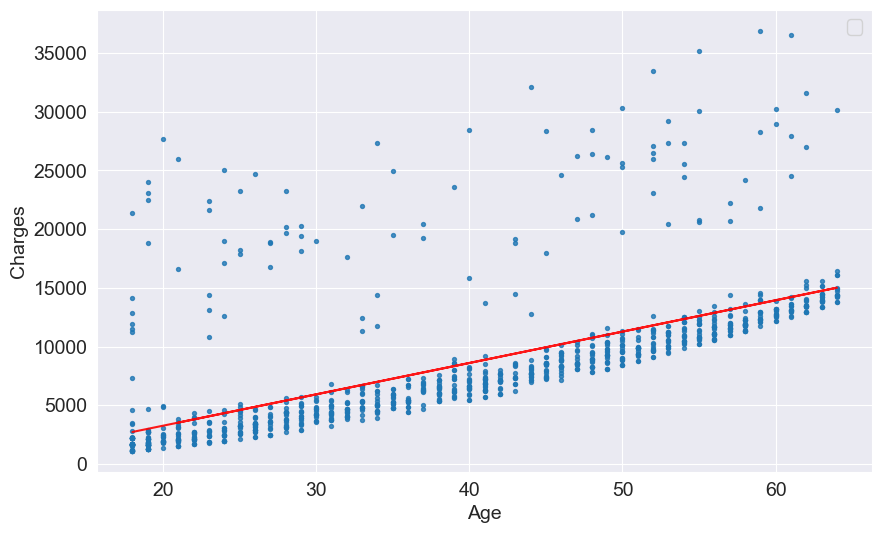

In [102]:
# let us plot this w and b given by our model on the initial scatter plot that we had

try_parameters(model.coef_, model.intercept_)

## You can see that the regression line is slighly above the cluster. This is to account for outliers.

By default, sklearn uses the Ordinary Least Squares Optimizer.

Now let us try using the Stochastic Gradient Descent Optimizer

We call that class using SGDRegressor

====================================================================================

#### Now create a linearRegression model for Smokers 





======================================================================


Every Model you will be building primarily consists of 3 parts.

1. The Model: Do you want to model the relationship as a linear eqn, or polynomial eqn, or decision tree, or etc. Every model has parameters, and it is the params that differentiates on model from another.
2. Cost / Loss Function - to tell how the model is working. The loss value after doing all the predictions gives you an idea of how different your prediction may be from the real results.
3. Optimization : To optimize the values of the parameters in order to reduce the cost function and make the model fit well to the data.

MULTIPLE LINEAR REGRESSION

charge = (w1 x age) + (w2 x bmi) + b

where b - bias

Since this is made up of two input variables, it is no more just a line but a plane in the 3-D Space.
So the model is rather in the x-y-z plane.

In [103]:
#TRAINING THE MULTIPLE LINEAR REGRESSION MODEL


inputs, targets = non_smoker_df[['age', 'bmi']], non_smoker_df['charges']

model = LinearRegression().fit(inputs, targets)

predictions = model.predict(inputs)

loss = rmse(targets, predictions)

print("Loss:", loss)

Loss: 4662.3128354612945


In [ ]:


non_smoker_df.charges.corr(non_smoker_df.bmi)


# BMI for Non-Smokers Has an Extremely Weak Correlation with Charges, that is why it's presence did not significantly improve the model.

0.08403654312833271

In [105]:
# Let us also draw a scatter plot between BMI and Charges for Non Smokers to paint our the fact that, there is no real pattern between them.

fig = px.scatter(non_smoker_df,
                   x='bmi',
                   y='charges',
                   title='BMI Vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

In [ ]:
model.coef_, model.intercept_



(array([266.87657817,   7.07547666]), -2293.6320906488727)

Now that you know that there is no relationship between BMI and Charges, go ahead a create an AI model that Predicts charges using on BMI Data

And compute the Loss of the function and let us see.

The model should perform very bad since there's not any relationship between them.


MULTIPLE LINEAR REGRESSION WITH 3 VARIABLES

### charges = w1 x age + w2 x bmi + w3 x children + b



In [ ]:
# Correlation between charges and children
non_smoker_df.charges.corr(non_smoker_df.children)

0.13892870453542205

In [ ]:
fig = px.strip(non_smoker_df, x='children', y='charges', title='Children Vs. Charges')
fig.update_traces(marker_size=4, marker_opacity=0.7)
fig.show()

In [109]:
#TRAINING THE MULTIPLE LINEAR REGRESSION MODEL


inputs, targets = non_smoker_df[['age', 'bmi', 'children']], non_smoker_df['charges']

model = LinearRegression().fit(inputs, targets)

predictions = model.predict(inputs)

loss = rmse(targets, predictions)

print("Loss:", loss)

## We can see some slight reduction in the loss

Loss: 4608.470405038246


NOW LET US APPLY THIS MODEL BUILDING TECHNIQUE TO OUR ENTIRE DATA INSTEAD OF SEPARATING NON-SMOKERS FROM SMOKERS

In [ ]:
inputs, targets = medical_df[['age', 'bmi', 'children']], medical_df['charges']

model = LinearRegression().fit(inputs, targets)

predictions = model.predict(inputs)

loss = rmse(targets, predictions)

print("Loss:", loss)




Loss: 11355.317901125973


In [ ]:
px.scatter(medical_df, x='age', y='charges', color='smoker')


HOW ABOUT CATEGORICAL VARIABLES

If we can use categorical columns like "Smoker", we can train a single model for the entire dataset. ie. A model that is aware of the smoker 
and non-smoker classes.

There are 3 main ways in which you can convert categorical data into numbers.

1. Binary columns could be converted into 0s and 1s.
2. For columns with more than 2 categories we perform one-hot encoding. ie. create a new column for each category and put in a 1 for the category that returns true and the others 0s.
3. If there is an inherent order, you use ordinal numbers.

<Axes: xlabel='smoker', ylabel='charges'>

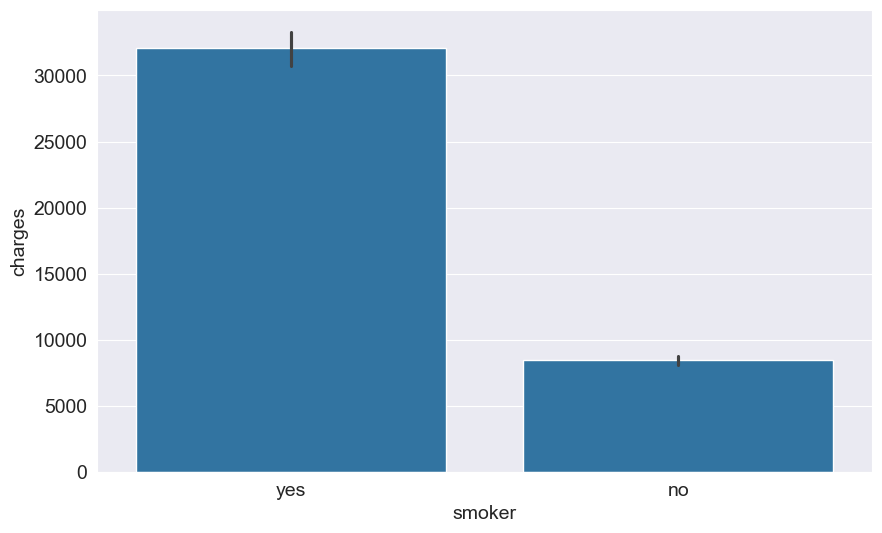

In [ ]:
sns.barplot(data=medical_df, x='smoker', y='charges')


In [ ]:
smoker_codes = {'no':0, 'yes':1}
medical_df['smoker_code'] = medical_df.smoker.map(smoker_codes)

In [ ]:
sex_codes = {'female':0, 'male':1}
medical_df['sex_code'] = medical_df.sex.map(sex_codes)

In [ ]:
medical_df


,age,sex,bmi,children,smoker,region,charges,smoker_code
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0
1334,18,female,31.920,0,no,northeast,2205.98080,0
1335,18,female,36.850,0,no,southeast,1629.83350,0
1336,21,female,25.800,0,no,southwest,2007.94500,0


In [ ]:
medical_df.charges.corr(medical_df.smoker_code)


0.7872514304984778

Now that we have this field "smoker_code" as numerical, we can plug it into our AI model and see if we'll get good results

charges = w1 x age + w2 x bmi + w3 x children + w4 x smoker_code + b

In [ ]:
inputs, targets = medical_df[['age', 'bmi', 'children', 'smoker_code']], medical_df['charges']

model = LinearRegression().fit(inputs, targets)

predictions = model.predict(inputs)

loss = rmse(targets, predictions)

print("Loss:", loss)

Loss: 6056.439217188081


DOES THE REGION WHERE ONE STAY, HAVE ANY IMPACT ON THE CHARGES?

You can see that, region is categorical, "South East, South West, North East, North West"

We have to find a way of making these numerical

# One-Hot Encoding

In [119]:
from sklearn import preprocessing

enc = preprocessing.OneHotEncoder()
enc.fit(medical_df[['region']])
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [120]:
one_hot = enc.transform(medical_df[['region']]).toarray()
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [121]:
medical_df[['northeast', 'northwest', 'southeast', 'southwest']] = one_hot
medical_df

## ONE-HOT ENCODING SUCCESSFULLY DONE

,age,sex,bmi,children,smoker,region,charges,smoker_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0.0,0.0,0.0,1.0


Now that we have regions as numerical variables, we can include them in our model

#### charges = w1 x age + w2 x bmi + w3 x children +  w4 x smoker + w5 x sex + w6 x region + b



In [ ]:
inputs, targets = medical_df[['age', 'bmi', 'children', 'smoker_code', 'northeast', 'northwest', 'southeast', 'southwest']], medical_df['charges']

model = LinearRegression().fit(inputs, targets)

predictions = model.predict(inputs)

loss = rmse(targets, predictions)

print("Loss:", loss)


Loss: 6042.033215394104


ASSIGNMENT
Find out whether two separate linear regression models (One for smoker and the other for non-smoker) gives a better Loss compared to one linear regression model.



Regression is based on WEIGHTS
There may be instances where your model works on DECISION instead of WEIGHT
ie. Whether the person is a smoker or not, whether they stay in North West or Not, whether they are over 40 or not. All these questions are asked by the model to be able to make a decision.

This is the ML Technique:

##### DECISION TREES

##### Important Point
For policy issues, you have to be able to explain the decisions being made by your model.
You know correlation does not neccessarily mean causation and so you can just predict with your model and say that nis final. You should be able to prove what features informed your model's predictions/decisions.

#### charges = w1 x age + w2 x bmi + w3 x children +  w4 x smoker + w5 x sex + w6 x northeast + w7 x northwest + w8 x southeast + w9 x southwest + b

Time stamp - 2:00:00

So if it is a Linear Regression Model, then you will make reference to the WEIGHTS assigned to each variable to justify why the person with who answers "Yes/No" to a certain parameter is supposed to pay that more or less than another who gives an opposite response.

But there is a catch. That will be mentioned in the next set of cells



In [ ]:
model.coef_

array([  256.97358248,   338.66463761,   474.56646951, 23836.30050226,
         586.47922829,   234.2971161 ,  -447.88089913,  -372.89544526])

But, there is a catch it seems like: BMI and Children have a higher weight or effect on the model compared to AGE, which wasn't the trend we saw when exploring the data.

There is an explanation to this. 
There is a higher range of Ages(18-60) compared to BMI(15 - 40 and some few 50) and Number of Children(0-4).   

So the weight doesn't accurately represent which of the features are more important, becase the range of possible values between the various feature values are different.


#### More Importantly
A column with a larger range of inputs may disproportionally affect the loss and dominate the optimization process. ie. All efforts will be spent optimizing the loss for just that column, because the optimization process takes into consideration all those values.

SOLUTION - STANDARDIZATION
We perform standardization of all the columns. Just like we do normalization of images in the preprocessing stage.

z = (x - u)/ d  
ie.
z = (particular value on the colunm - sample mean)/ standard deviation
So here, we scale the column down, to make it a normal distribution with a mean of zero and standard deviation of 1.

To do this in SKLEARN
Use the STANDARD SCALER class


In [130]:
medical_df['age'].describe()

medical_df['bmi'].describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [131]:
from sklearn.preprocessing import StandardScaler

numeric_cols = ['age', 'bmi', 'children']
scaler = StandardScaler()
scaler.fit(medical_df[numeric_cols])

StandardScaler()

In [134]:
# Checking the mean and variance of each of the three variables
scaler.mean_
scaler.var_

array([197.25385199,  37.16008997,   1.45212664])

In [136]:
scaled_inputs = scaler.transform(medical_df[numeric_cols])
scaled_inputs

## Here, you can see the values have been completely scaled down

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]])

In [ ]:
cat_cols = ['smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
categorical_data = medical_df[cat_cols].values
inputs



,age,bmi,children,smoker_code,northeast,northwest,southeast,southwest
0,19,27.900,0,1,0.0,0.0,0.0,1.0
1,18,33.770,1,0,0.0,0.0,1.0,0.0
2,28,33.000,3,0,0.0,0.0,1.0,0.0
3,33,22.705,0,0,0.0,1.0,0.0,0.0
4,32,28.880,0,0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,0.0,1.0,0.0,0.0
1334,18,31.920,0,0,1.0,0.0,0.0,0.0
1335,18,36.850,0,0,0.0,0.0,1.0,0.0
1336,21,25.800,0,0,0.0,0.0,0.0,1.0


In [ ]:
my_input = np.concatenate((scaled_inputs, categorical_data), axis=1)
my_targets = medical_df.charges

my_model = LinearRegression().fit(my_input, my_targets)

my_predictions = my_model.predict(my_input)

loss = rmse(my_targets, my_predictions)
print("Loss", loss)

Loss 6041.679651174452


In [ ]:
my_input[0]

array([-1.43876426, -0.45332   , -0.90861367,  1.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  1.        ])

In [ ]:
weights_df = pd.DataFrame({
    'feature': np.append(numeric_cols + cat_cols, 1),
    'weight': np.append(my_model.coef_, my_model.intercept_)
})
weights_df.sort_values('weight', ascending=False)

['smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']


,feature,weight
3,smoker_code,23848.534542
9,1,8466.483215
0,age,3607.472736
1,bmi,2067.691966
5,northeast,587.009235
2,children,572.998210
6,northwest,234.045336
4,sex_code,-131.314359
8,southwest,-373.041756
7,southeast,-448.012814


In [ ]:
new_person = [[28, 30, 2, 1, 0,0,1,0,0.0]]
scaler.transform([[28, 30, 2]])

model.predict([[-0.79795355, -0.10882659,  0.75107928,1,0,0,1,0,0.]])

c:\Users\PHG HUB\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



array([29875.81463371])

So the most import features here are 
1. Smoker
2. Age
3. BMI

Note that ALways, the Loss on your Test Set will be Higher than the Loss on your Training Set, since the Test Set or Validation Set is a division of data that your model hasn't seen before. 